In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv("../Téléchargements/listings.csv")

In [19]:
print("shap of data",df.shape)
df.head()

shap of data (17230, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549
3,32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24,HUTB-001722
4,46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1,Exempt


#we have 17230 rows and 18 columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17230 non-null  int64  
 1   name                            17230 non-null  object 
 2   host_id                         17230 non-null  int64  
 3   host_name                       17228 non-null  object 
 4   neighbourhood_group             17230 non-null  object 
 5   neighbourhood                   17230 non-null  object 
 6   latitude                        17230 non-null  float64
 7   longitude                       17230 non-null  float64
 8   room_type                       17230 non-null  object 
 9   price                           17230 non-null  int64  
 10  minimum_nights                  17230 non-null  int64  
 11  number_of_reviews               17230 non-null  int64  
 12  last_review                     

In [21]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4032
reviews_per_month                 4032
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8368
dtype: int64

In [22]:
#dropping columns that are not significant 
df.drop(['id','license'], axis=1, inplace=True)
#examing the changes
df.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8
1,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13
2,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22


In [23]:
df.describe()
#we see here some things strange like min in price egual zero

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.723000e+04,17230.000000,17230.000000,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000,17230.000000
mean,1.577106e+08,41.391854,2.167149,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208,11.988799
std,1.652453e+08,0.013882,0.017245,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430,23.295948
min,3.073000e+03,41.352608,2.091590,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.536735e+06,41.381040,2.157150,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000,0.000000
50%,8.489767e+07,41.389566,2.168260,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000,2.000000
75%,2.871165e+08,41.401190,2.177500,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000,16.000000
max,5.185810e+08,41.459560,2.227710,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000,768.000000


In [24]:
df.describe(include="object")

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,17230,17228,17230,17230,17230,13198
unique,6184,3261,10,70,4,1632
top,Rental unit in Barcelona · 1 bedroom · 1 bed ·...,Ukio,Eixample,la Dreta de l'Eixample,Entire home/apt,2023-06-05
freq,652,265,6244,2213,10262,477


In [25]:
#count number of neighbourhood_group
df.neighbourhood_group.unique()

array(['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella', 'Sant Andreu',
       'Sarrià-Sant Gervasi', 'Sants-Montjuïc', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris'], dtype=object)

In [26]:
#df.dropna(inplace =True)
#count to type of room
df.room_type.unique() 

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [27]:
popular_neighborhoods = df['neighbourhood_group'].value_counts(normalize=True)
print(popular_neighborhoods)

Eixample               0.362391
Ciutat Vella           0.239582
Sants-Montjuïc         0.101741
Sant Martí             0.089437
Gràcia                 0.086129
Sarrià-Sant Gervasi    0.047649
Horta-Guinardó         0.029425
Les Corts              0.019269
Sant Andreu            0.013349
Nou Barris             0.011027
Name: neighbourhood_group, dtype: float64


In [48]:
# Get the average price of Airbnb listings by neighborhood
average_prices_by_neighborhood = df.groupby('neighbourhood_group')['price'].mean()
print(average_prices_by_neighborhood)

neighbourhood_group
Ciutat Vella           138.169816
Eixample               221.583120
Gràcia                 152.638814
Horta-Guinardó         211.603550
Les Corts              193.415663
Nou Barris              69.663158
Sant Andreu             80.208696
Sant Martí             177.519792
Sants-Montjuïc         152.783229
Sarrià-Sant Gervasi    166.362972
Name: price, dtype: float64


In [29]:
print("Here we see the average price of the different neighborhood group but we have 3 groups in close proximity:Eixample,Horta-Guinardo,Les Corts")

Here we see the average price of the different neighborhood group but we have 3 groups in close proximity:Eixample,Horta-Guinardo,Les Corts


Text(0.5, 1.0, 'freq_room_type')

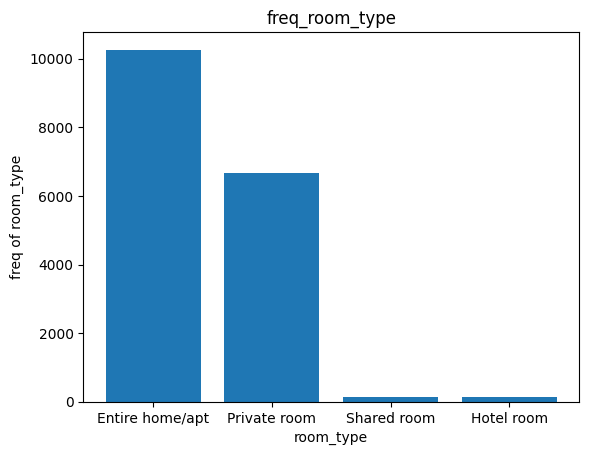

In [30]:
#pd.crosstab(df['neighbourhood'],df['price'])
Room_type= df["room_type"].value_counts()
plt.bar(Room_type.index, Room_type.values)
plt.xlabel('room_type')
plt.ylabel('freq of room_type')
plt.title('freq_room_type')

In [31]:
average_prices_by_room_type = df.groupby("room_type")['price'].mean().head()
print(average_prices_by_room_type)

room_type
Entire home/apt    213.150653
Hotel room         251.307692
Private room       124.016180
Shared room         70.006667
Name: price, dtype: float64


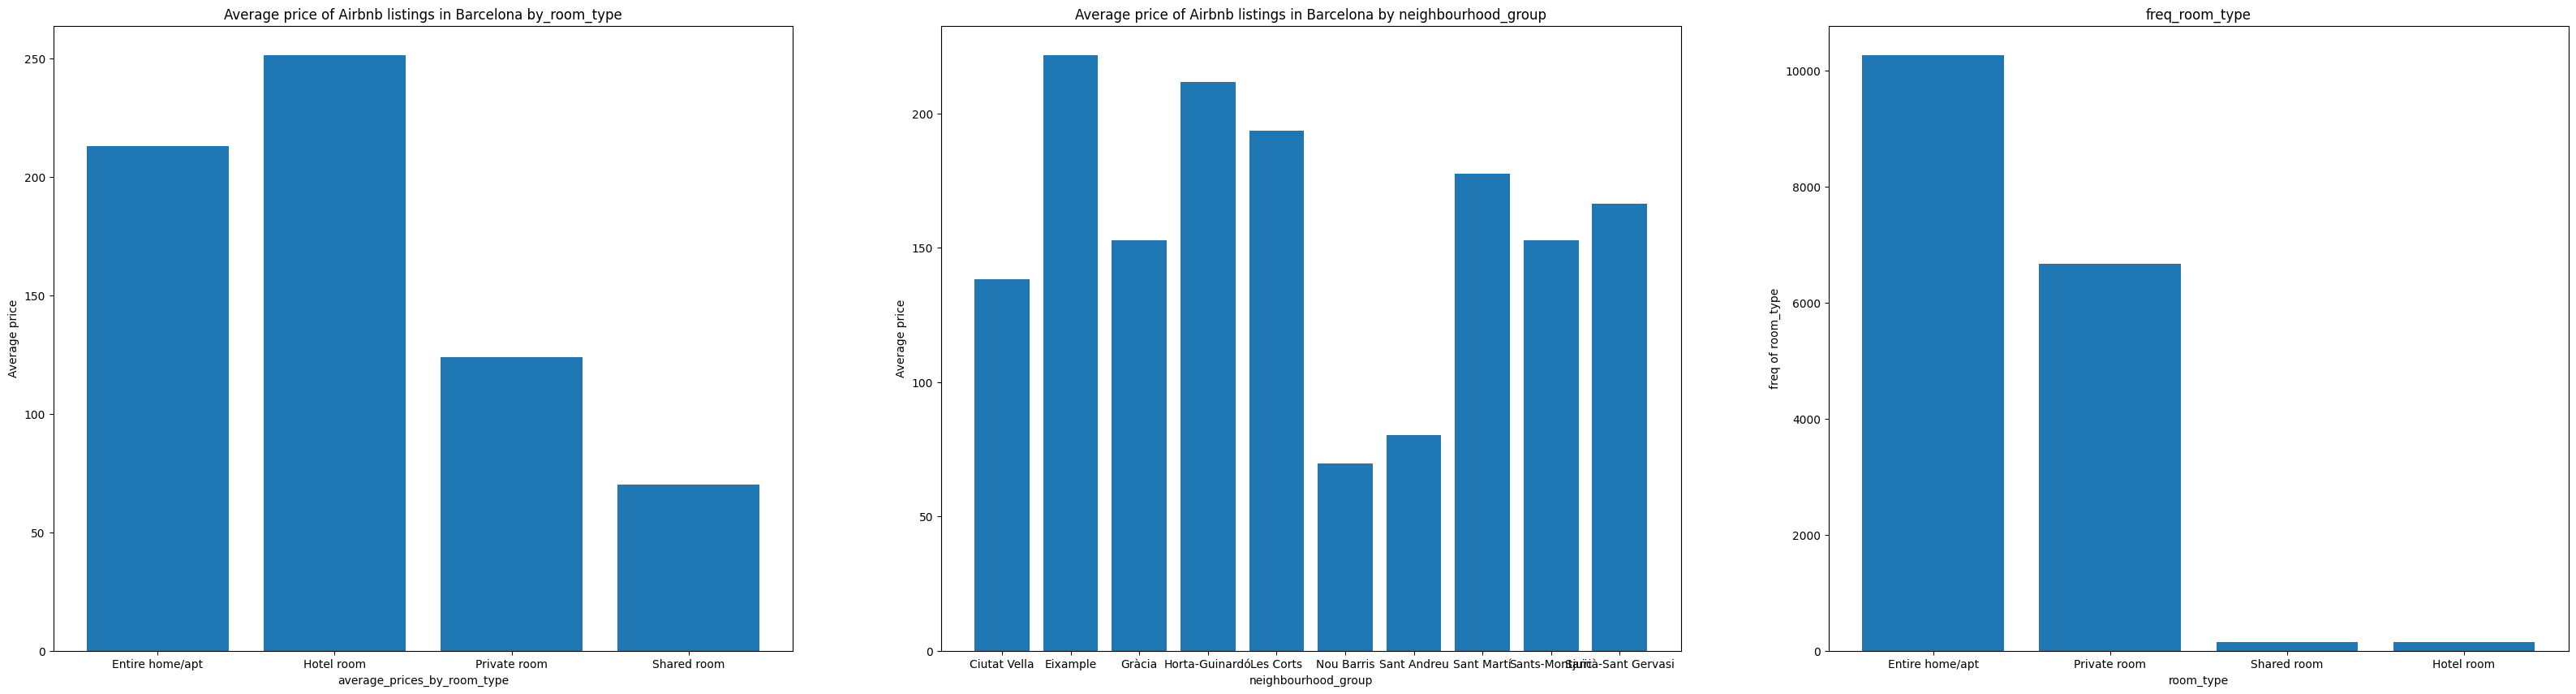

In [58]:
#df.pivot_table(['Charter',"carriergroup"],['airlineid'],aggfunc="mean")
# Plot the average price of Airbnb listings by neighborhood
plt.figure(figsize=(40, 10))
plt.subplot(1, 3, 1)
plt.bar(average_prices_by_room_type.index, average_prices_by_room_type.values)
plt.xlabel('average_prices_by_room_type')
plt.ylabel('Average price')
plt.title('Average price of Airbnb listings in Barcelona by_room_type')
##########################################
plt.subplot(1, 3, 2)
# Plot the average price of Airbnb listings by neighborhood
plt.bar(average_prices_by_neighborhood.index, average_prices_by_neighborhood.values)
plt.xlabel('neighbourhood_group')
plt.ylabel('Average price')
plt.title('Average price of Airbnb listings in Barcelona by neighbourhood_group')
##########################################
plt.subplot(1, 3, 3)
Room_type= df["room_type"].value_counts()
plt.bar(Room_type.index, Room_type.values)
plt.xlabel('room_type')
plt.ylabel('freq of room_type')
plt.title('freq_room_type')
plt.show()



In [33]:
#we see here number of hotel room little but when we average price we find htel room has high price
#so that is  affect about averge price in neighbourhood group if this neighbourhood has many hotel room then averge become very high

In [59]:
cross_neighbourhood_group = pd.crosstab(df['neighbourhood_group'],df["room_type"])
cross_neighbourhood_group

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Ciutat Vella,2275,26,1819,8
Eixample,3928,88,2152,76
Gràcia,930,12,526,16
Horta-Guinardó,235,0,269,3
Les Corts,219,0,110,3
Nou Barris,47,0,140,3
Sant Andreu,108,0,118,4
Sant Martí,947,3,573,18
Sants-Montjuïc,1035,10,697,11


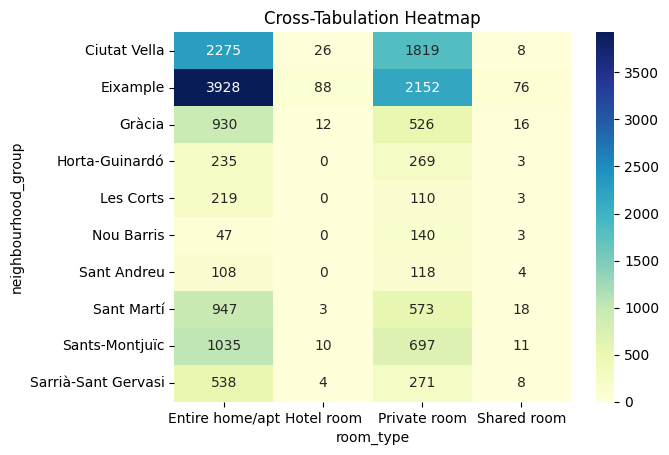

In [60]:
# Plot a heatmap
sns.heatmap(cross_neighbourhood_group, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.title('Cross-Tabulation Heatmap')
plt.show()

In [61]:
#so here we see type and number of room explain why averge of price high but for group neighbrhood Les Corts
#we think there are another features can you affect in price

In [62]:
availbity_neigh = df.groupby('neighbourhood_group')["availability_365"].mean()
availbity_neigh 
#crosstab(df['neighbourhood_group'],df["availability_365"])

neighbourhood_group
Ciutat Vella           166.537064
Eixample               180.622678
Gràcia                 175.826146
Horta-Guinardó         166.765286
Les Corts              163.777108
Nou Barris             157.847368
Sant Andreu            161.817391
Sant Martí             159.941596
Sants-Montjuïc         161.099258
Sarrià-Sant Gervasi    195.099878
Name: availability_365, dtype: float64

In [65]:
availbity_type = df.groupby("room_type")["availability_365"].mean()
availbity_type

room_type
Entire home/apt    190.642955
Hotel room         193.776224
Private room       144.101723
Shared room        169.460000
Name: availability_365, dtype: float64

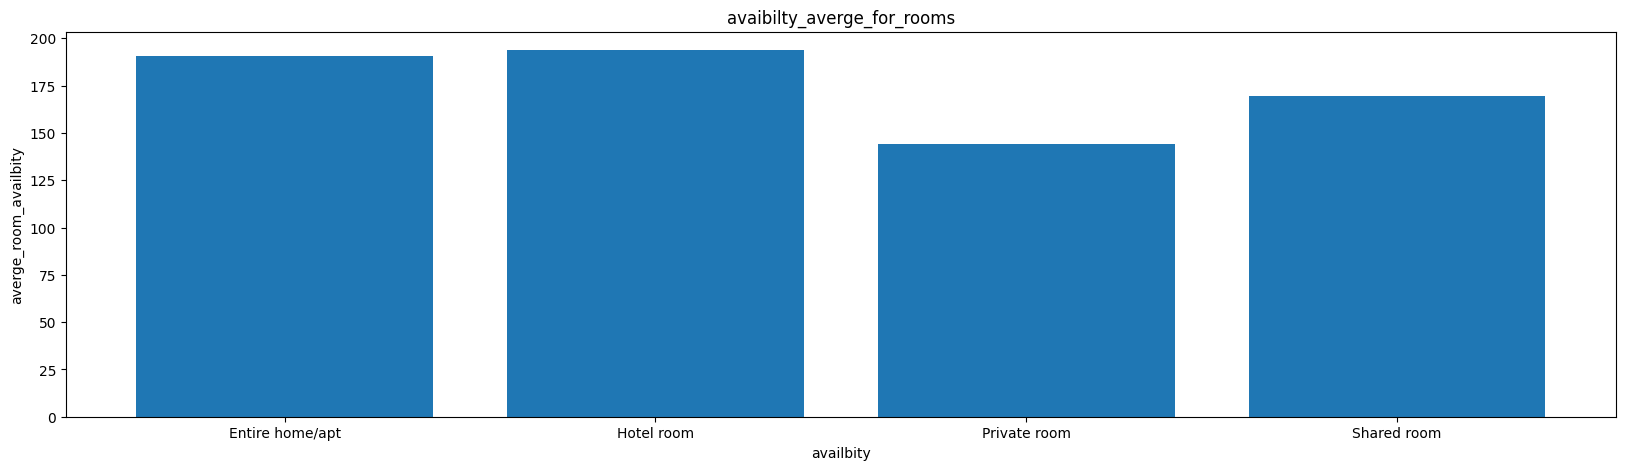

In [66]:
plt.figure(figsize=(20, 5))
plt.bar(availbity_type.index, availbity_type.values)
plt.xlabel('availbity')
plt.ylabel('averge_room_availbity')
plt.title('avaibilty_averge_for_rooms')
plt.show()
#that explique why neighbrhood have many Entire home and hotel room its averge price high

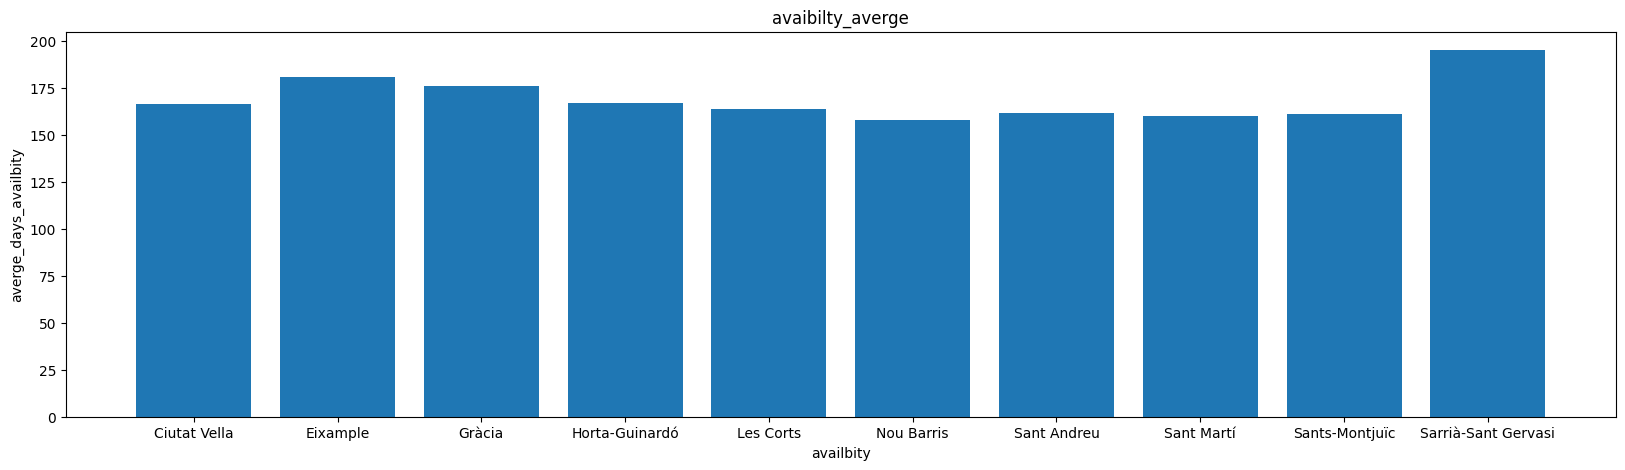

In [63]:
plt.figure(figsize=(20, 5))
plt.bar(availbity_neigh.index, availbity_neigh.values)
plt.xlabel('availbity')
plt.ylabel('averge_days_availbity')
plt.title('avaibilty_averge')
plt.show()

In [ ]:
#that avaibility can exlplain also why average price is high Sarria-sant Gervasi

In [68]:

number_of_reviews_type = df.groupby("room_type")["number_of_reviews"].mean()
number_of_reviews_type

room_type
Entire home/apt    52.918242
Hotel room         43.678322
Private room       25.540674
Shared room        61.520000
Name: number_of_reviews, dtype: float64

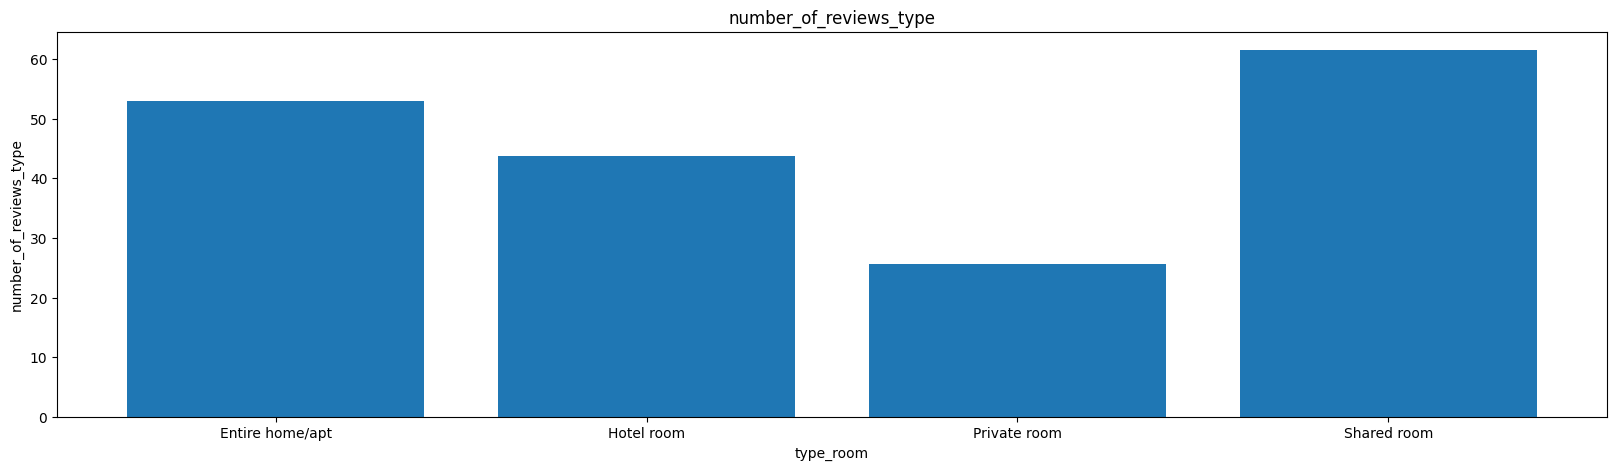

In [69]:
plt.figure(figsize=(20, 5))
plt.bar(number_of_reviews_type.index, number_of_reviews_type.values)
plt.xlabel('type_room')
plt.ylabel('number_of_reviews_type')
plt.title('number_of_reviews_type')
plt.show()

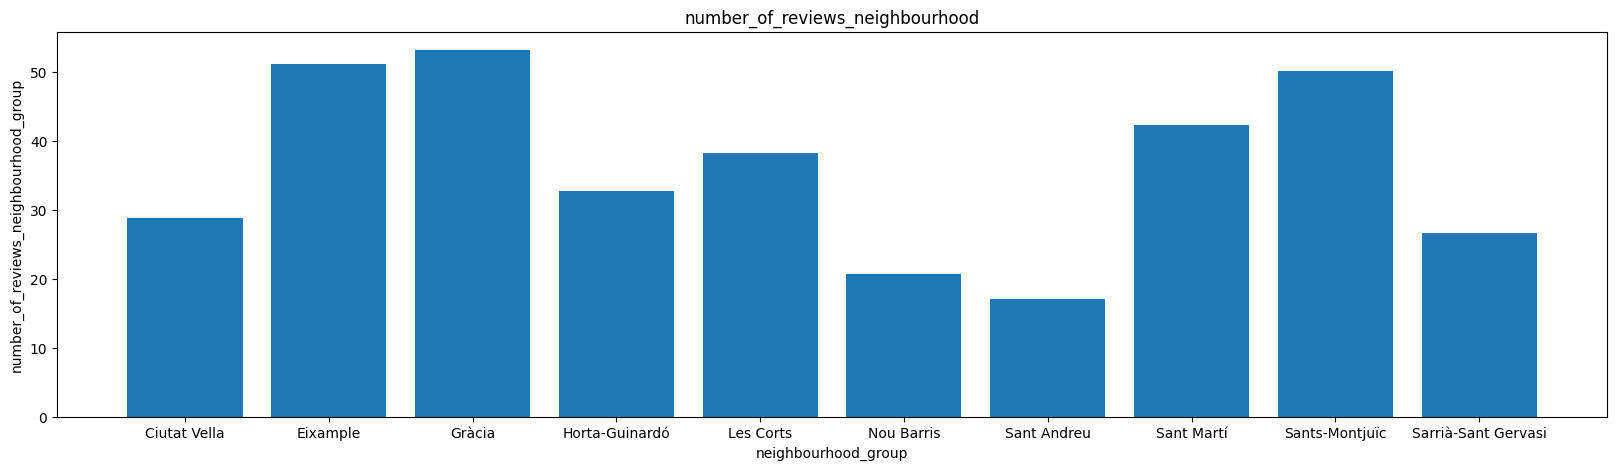

In [72]:
number_of_reviews_neighbourhood_group = df.groupby('neighbourhood_group')["number_of_reviews"].mean()
plt.figure(figsize=(20, 5))
plt.bar(number_of_reviews_neighbourhood_group.index, number_of_reviews_neighbourhood_group.values)
plt.xlabel('neighbourhood_group')
plt.ylabel('number_of_reviews_neighbourhood_group')
plt.title('number_of_reviews_neighbourhood')
plt.show()
#that is explain why some neighbrhood have high price

In [70]:

minimum_nights_type = df.groupby("room_type")["minimum_nights"].mean()
minimum_nights_type

room_type
Entire home/apt    14.694601
Hotel room          1.867133
Private room       14.338577
Shared room         6.080000
Name: minimum_nights, dtype: float64

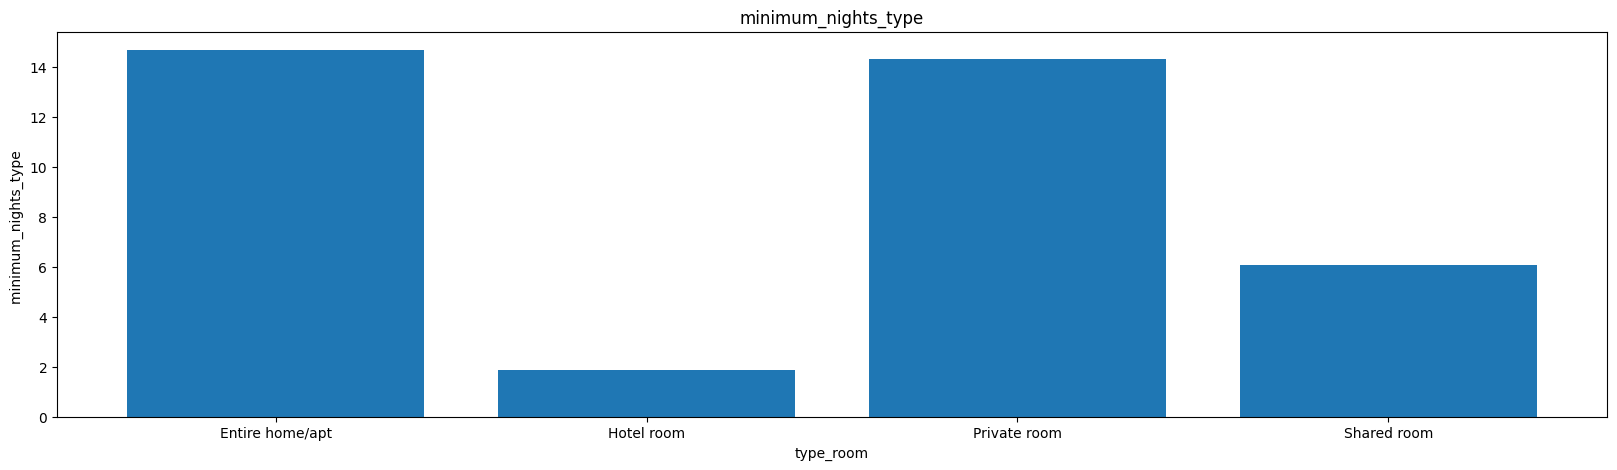

In [71]:
plt.figure(figsize=(20, 5))
plt.bar(minimum_nights_type.index, minimum_nights_type.values)
plt.xlabel('type_room')
plt.ylabel('minimum_nights_type ')
plt.title('minimum_nights_type')
plt.show()